This notebook explores for the 436 foods on the [SCD legal/illegal list](https://img1.wsimg.com/blobby/go/21ba9451-60ad-4d5e-b65c-6d5706d350ef/The%20Legal%20_%20Illegal%20list%20August%202022%20(1).pdf). It is based off of the [OpenAI cookbook](https://github.com/openai/openai-cookbook/blob/main/examples/Visualizing_embeddings_in_2D.ipynb) for 2D embedding visualization. 

## Visualization

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
datafile_path = "legal_list_with_embeddings.csv"
df = pd.read_csv(datafile_path, sep=":")

# Convert to a list of lists of floats
matrix = np.array(df.ada_embedding.apply(eval).to_list())

# Add binary flag "legal" to dataframe
df["legal"] = df["status"].apply(lambda x: 1 if x=="Legal" else 0)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(436, 2)

Text(0.5, 1.0, 'SCD diet list visualized using t-SNE')

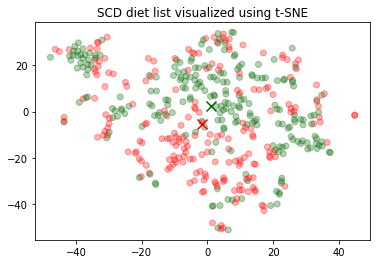

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.legal.values

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for legal_value in [0,1]:
    avg_x = np.array(x)[df.legal==legal_value].mean()
    avg_y = np.array(y)[df.legal==legal_value].mean()
    color = colors[legal_value]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("SCD diet list visualized using t-SNE")

The chart above shows the 412 foods labeled clustered as illegal/legal in 2D space.

Run `%env OPENAI_API_KEY=<your-api-key`

In [2]:
import json
import numpy
import pandas as pd
from numpy import dot, array
from numpy.linalg import norm

from get_embeddings import get_embedding

def cosine_similarity(a,b):
    assert a.shape == b.shape
    return dot(a,b)/(norm(a)*norm(b))

def search_items(df, item, n=5):
    embedding = array(get_embedding(item))
    df['similarities'] = df.ada_embedding.apply(
        lambda x: cosine_similarity(embedding, array(json.loads(x)))
    )
    res = df.sort_values('similarities', ascending=False).head(n)
    return res

In [9]:
df = pd.read_csv('legal_list_with_embeddings.csv', sep=":")
res = search_items(df, 'soy sauce')
print(res[["item","similarities","status"]])

                  item  similarities   status
365          Soy Sauce      0.969979  Illegal
367        Soybean oil      0.889260    Legal
366       Soybean milk      0.881652  Illegal
363                Soy      0.880476  Illegal
188  Horseradish sauce      0.869623    Legal
